**Linear Regression**

In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read csv file into a pandas dataframe
df = pd.read_csv('lregdata.csv')
df

,x,y
0,-2,1
1,-1,2
2,0,3
3,1,3
4,2,4


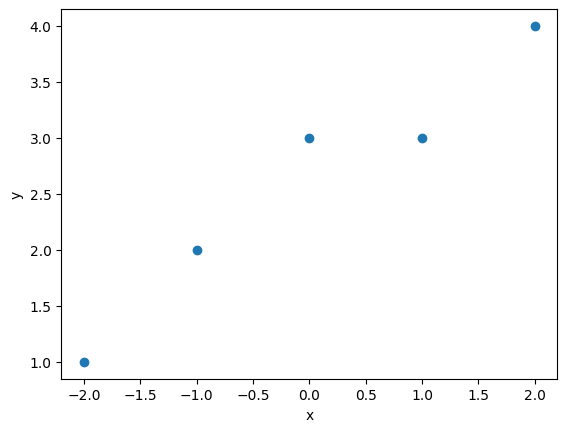

In [3]:
# Linear regression
# y = mx + b
# m is slope, b is y-intercept
# m = (mean(x) * mean(y) - mean(x*y)) / (mean(x)^2 - mean(x^2))
# b = mean(y) - m * mean(x)

# Calculate m and b
def best_fit_slope_and_intercept(xs, ys):
    m = ( ((mean(xs) * mean(ys)) - mean(xs*ys)) /
          ((mean(xs)*mean(xs)) - mean(xs*xs)) )
    b = mean(ys) - m*mean(xs)
    return m, b

# Calculate mean
def mean(values):
    return sum(values) / float(len(values))

# Plot the data
xs = np.array(df['x'], dtype=np.float64)
ys = np.array(df['y'], dtype=np.float64)
plt.scatter(xs, ys)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

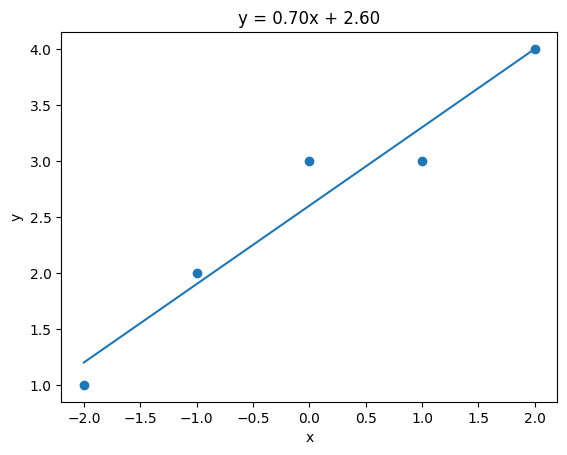

In [4]:
# Plot the regression line
m, b = best_fit_slope_and_intercept(xs, ys)
regression_line = [(m*x)+b for x in xs]
# print(regression_line)
plt.scatter(xs, ys)
plt.plot(xs, regression_line)
plt.title(f'y = {m:.2f}x + {b:.2f}')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


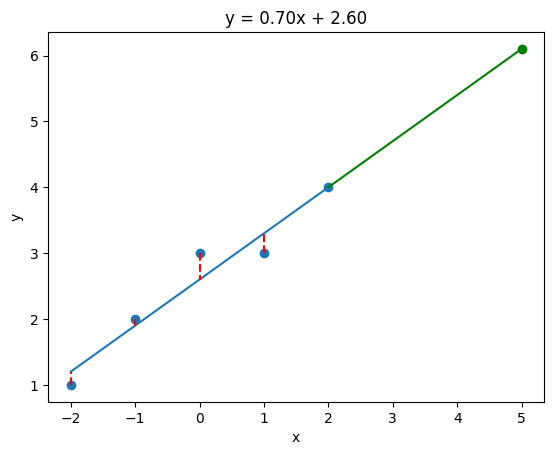

In [5]:
# Predict y for a given x
predict_x = float(input('Enter x: '))
predict_y = (m*predict_x)+b

# Plot the prediction
plt.scatter(xs, ys)
plt.scatter(predict_x, predict_y, color='g')
plt.plot(xs, regression_line)
# Plot the prediction line
extended_x = [xs[-1], predict_x]
plt.plot(extended_x, [regression_line[-1], predict_y], color='g')
# Plot the errors (a dashed line from (xs, ys) to (xs, point_on_line(xs)))
for i in range(len(xs)):
    plt.plot([xs[i], xs[i]], [ys[i], regression_line[i]], color='r', linestyle='--')
plt.title(f'y = {m:.2f}x + {b:.2f}')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [6]:
# Calculate squared error
def squared_error(ys_orig, ys_line):
    return sum((ys_line - ys_orig) * (ys_line - ys_orig))

# Calculate coefficient of determination
def coefficient_of_determination(ys_orig, ys_line):
    y_mean_line = [mean(ys_orig) for y in ys_orig]
    squared_error_regr = squared_error(ys_orig, ys_line)
    squared_error_y_mean = squared_error(ys_orig, y_mean_line)
    return 1 - (squared_error_regr / squared_error_y_mean)

print("Coefficient of Determination: ", coefficient_of_determination(ys, regression_line))

Coefficient of Determination:  0.9423076923076923
